In [25]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread("./picture1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

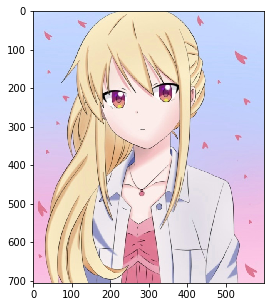

(706, 600, 3)


In [27]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [28]:
c_img = img.copy()
c_img = np.reshape(c_img, (-1,3))

print (c_img.shape)

(423600, 3)


In [29]:
kmeans = KMeans(n_clusters=7,random_state=2)

In [30]:
kmeans.fit_predict(c_img)

array([3, 3, 3, ..., 0, 0, 0])

In [31]:
centers = kmeans.cluster_centers_.astype(int)

print (centers)

[[235 192 226]
 [184 137 151]
 [114  85  85]
 [196 208 250]
 [245 227 189]
 [222 182 151]
 [239 229 232]]


In [32]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.11083805 0.07109065 0.02975921 0.27423749 0.19772899 0.08905807
 0.22728754]


In [33]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.2742374881964117, array([196, 208, 250])], [0.22728753541076488, array([239, 229, 232])], [0.1977289896128423, array([245, 227, 189])], [0.11083805476864966, array([235, 192, 226])], [0.08905807365439093, array([222, 182, 151])], [0.07109065155807365, array([184, 137, 151])], [0.029759206798866854, array([114,  85,  85])]]


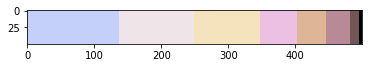

In [34]:
color_p = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()


In [35]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

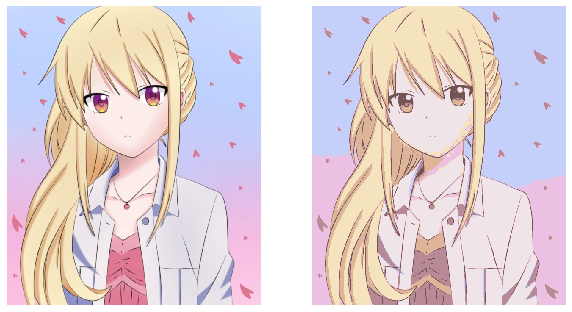

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(c_img)

plt.show()
#cv2.imwrite("new_picture2.png", c_img) 